In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models, applications, callbacks

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!rm -rf /root/tensorflow_datasets/cassava

In [4]:
#(train_ds, val_ds, test_ds), ds_info = tfds.load(
   # 'cassava',
   # split=['train', 'validation', 'test'],  # Verify splits exist for this dataset
   # shuffle_files=True,
   # as_supervised=True,
   # with_info=True
#)

In [5]:
#!cp -r /root/tensorflow_datasets/cassava /content/drive/MyDrive/

In [6]:
dataset_path = '/content/drive/MyDrive/cassava'

In [7]:
(train_ds, val_ds, test_ds), ds_info = tfds.load(
    'cassava',
    data_dir=dataset_path,  # Specify the directory where the dataset is saved
    split=['train', 'validation', 'test'],  # Verify splits exist for this dataset
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


In [8]:
class_names = ds_info.features['label'].names

In [9]:
print(f"Class names: {class_names}")

Class names: ['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']


In [10]:
ds_info

tfds.core.DatasetInfo(
    name='cassava',
    full_name='cassava/0.1.0',
    description="""
    Cassava consists of leaf images for the cassava plant depicting healthy and
    four (4) disease conditions; Cassava Mosaic Disease (CMD), Cassava Bacterial
    Blight (CBB), Cassava Greem Mite (CGM) and Cassava Brown Streak Disease (CBSD).
    Dataset consists of a total of 9430 labelled images.
    The 9430 labelled images are split into a training set (5656), a test set(1885)
    and a validation set (1889). The number of images per class are unbalanced with
    the two disease classes CMD and CBSD having 72% of the images.
    """,
    homepage='https://www.kaggle.com/c/cassava-disease/overview',
    data_dir='/content/drive/MyDrive/cassava/cassava/0.1.0',
    file_format=tfrecord,
    download_size=1.26 GiB,
    dataset_size=1.26 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        

In [11]:
training_set = ds_info.splits['train']

print(f"Training samples: {training_set.num_examples} values")

Training samples: 5656 values


In [12]:
validation_set = ds_info.splits['validation']

print(f"Validation samples: {ds_info.splits['validation'].num_examples} values")

Validation samples: 1889 values


In [13]:
test_set = ds_info.splits['test']

print(f"Test samples: {ds_info.splits['test'].num_examples} values")

Test samples: 1885 values


In [14]:
training_set

<SplitInfo num_examples=5656, num_shards=8>

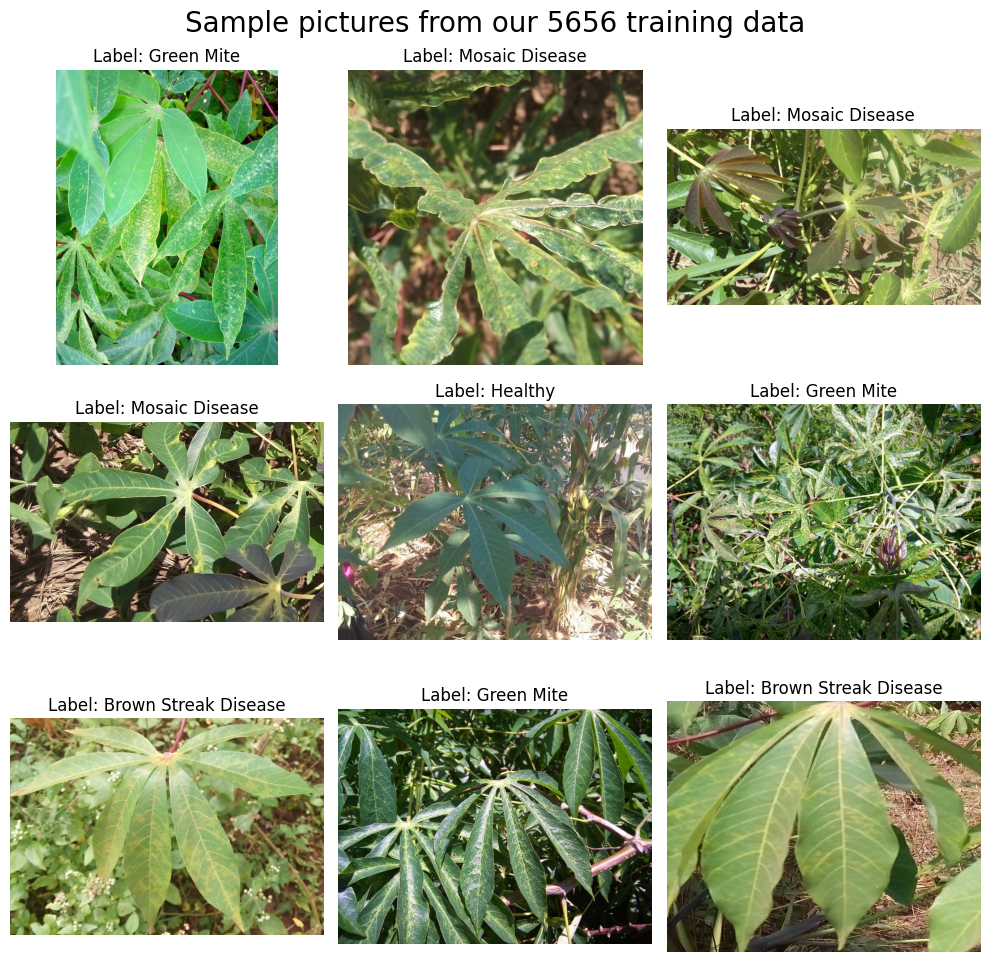

In [15]:
label_map = {
    0: 'Bacterial Blight',
    1: 'Brown Streak Disease',
    2: 'Green Mite',
    3: 'Mosaic Disease',
    4: 'Healthy',
    5: 'Unknown'
}

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    image = image.numpy()
    label = label.numpy()

    row, col = divmod(i, 3)
    ax = axes[row, col]

    ax.imshow(image)
    # Use the mapping to set the title with the disease name.
    ax.set_title(f"Label: {label_map[label]}")
    ax.axis("off")

fig.suptitle(f"Sample pictures from our {ds_info.splits['train'].num_examples} training data", fontsize=20)
plt.tight_layout()
plt.show()

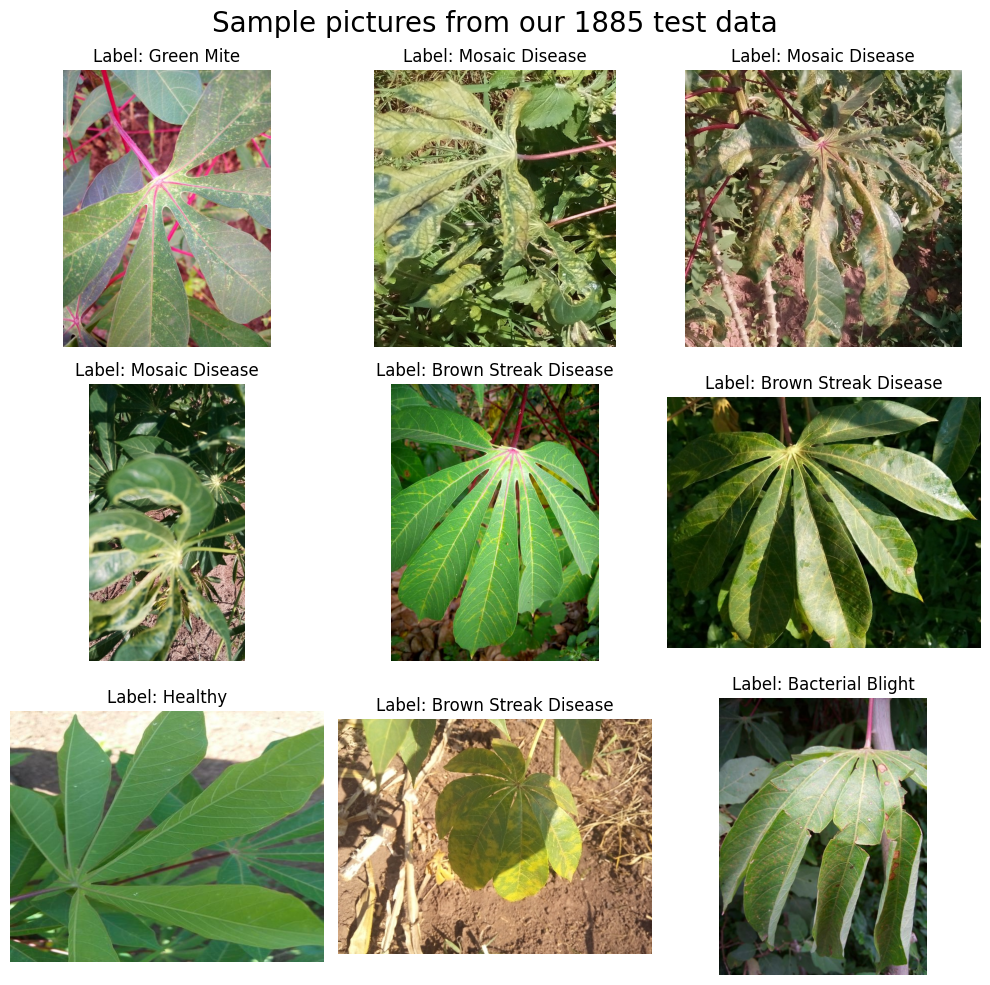

In [16]:
label_map = {
    0: 'Bacterial Blight',
    1: 'Brown Streak Disease',
    2: 'Green Mite',
    3: 'Mosaic Disease',
    4: 'Healthy',
    5: 'Unknown'
}

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, (image, label) in enumerate(test_ds.take(9)):
    image = image.numpy()
    label = label.numpy()

    row, col = divmod(i, 3)
    ax = axes[row, col]

    ax.imshow(image)
    # Use the mapping to set the title with the disease name.
    ax.set_title(f"Label: {label_map[label]}")
    ax.axis("off")

fig.suptitle(f"Sample pictures from our {ds_info.splits['test'].num_examples} test data", fontsize=20)
plt.tight_layout()
plt.show()

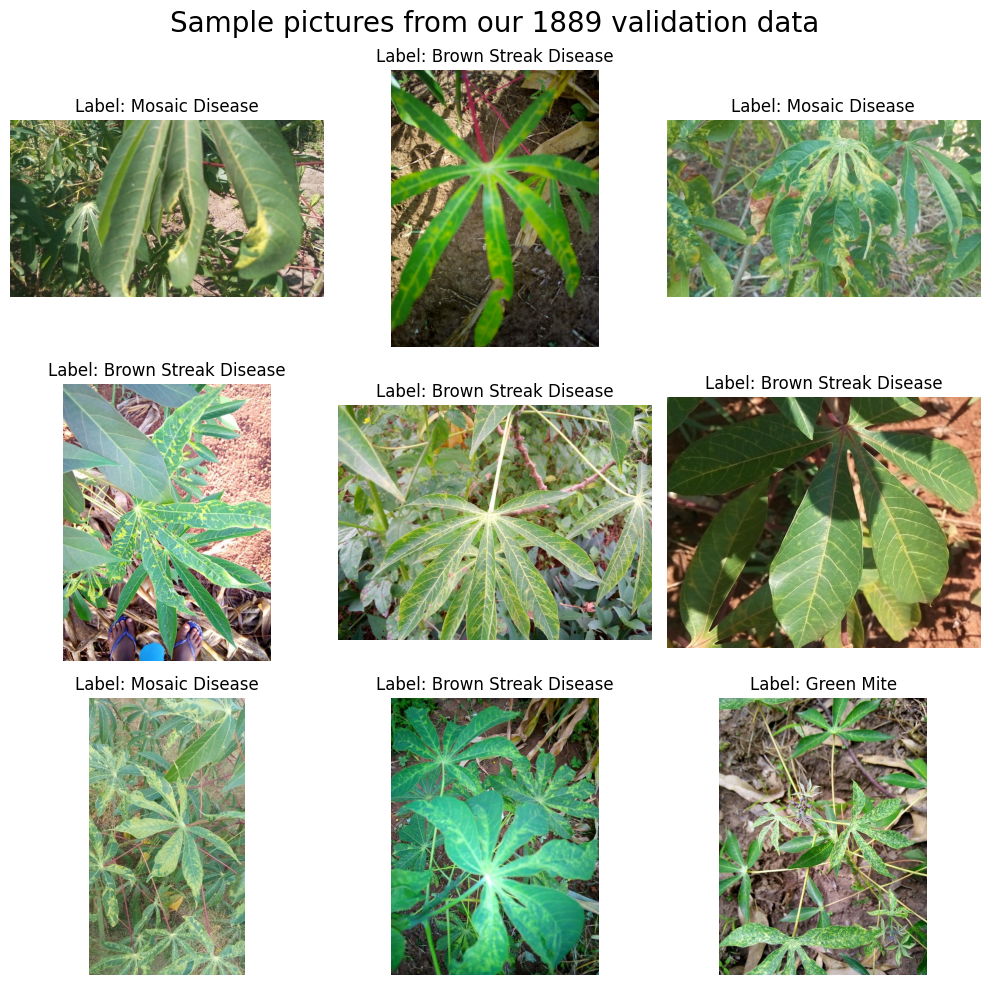

In [21]:
label_map = {
    0: 'Bacterial Blight',
    1: 'Brown Streak Disease',
    2: 'Green Mite',
    3: 'Mosaic Disease',
    4: 'Healthy',
    5: 'Unknown'
}

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, (image, label) in enumerate(val_ds.take(9)):
    image = image.numpy()
    label = label.numpy()

    row, col = divmod(i, 3)
    ax = axes[row, col]

    ax.imshow(image)
    # Use the mapping to set the title with the disease name.
    ax.set_title(f"Label: {label_map[label]}")
    ax.axis("off")

fig.suptitle(f"Sample pictures from our {ds_info.splits['validation'].num_examples} validation data", fontsize=20)
plt.tight_layout()
plt.show()

In [22]:
ds_info.splits['test'].num_examples

1885

In [19]:
#pip install --upgrade dataset-tools

In [20]:
#import dataset_tools as dtools

#dtools.download(dataset='Makerere University Cassava', dst_dir='~/dataset-ninja/')